<a href="https://colab.research.google.com/github/JonathanSum/Deep-Projects/blob/master/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabular models

<img src="https://imgur.com/wniZTh0.jpg" width=300>

In [1]:
!curl https://course.fast.ai/setup/colab | bash
from fastai.tabular import *

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0   2981      0 --:--:-- --:--:-- --:--:--  2981
Updating fastai...
Done.


Tabular data should be in a Pandas `DataFrame`.

In [0]:

path = Path('data/happy_sugar_life')
path.mkdir(parents=True, exist_ok=True)

In [0]:
df = pd.read_csv(path/'train.csv')

In [0]:
dep_var = 'Survived'       #target
#I am trying to pass 'PassengerId' because ID has no affect.
cat_names = ['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']      #varible input value, just like picture in pixel
cont_names = ['Age']       #constand, just like npl
procs = [FillMissing, Categorify, Normalize]          #instead of transfer, we use processing.
#For normalize, we subtract the mean and / by the std for continuous varible

In [0]:
# dep_var = 'Survived'       #target
# cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']    #constand, just like npl
# cont_names = ['age', 'fnlwgt', 'education-num']         #varible input value, just like picture in pixel
# procs = [FillMissing, Categorify, Normalize]          #instead of transfer, we use processing.
# #For normalize, we subtract the mean and / by the std for continuous varible

In [0]:
test = TabularList.from_df(df.iloc[0:802].copy(), path=path, cat_names=cat_names, cont_names=cont_names)


In [0]:
test = TabularList.from_df(df.iloc[0:802].copy(), path=path, cat_names=cat_names, cont_names=cont_names)
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(0,802)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [9]:
data.show_batch(rows=10)

Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na,Age,target
3,"Vander Cruyssen, Mr. Victor",male,0,0,345765,9.0,#na#,S,False,1.4231,0
3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,0,3,2666,19.2583,#na#,C,False,-0.2978,1
1,"Daly, Mr. Peter Denis",male,0,0,113055,26.55,E17,S,False,1.7224,1
2,"Duran y More, Miss. Asuncion",female,1,0,SC/PARIS 2149,13.8583,#na#,C,False,-0.0733,1
3,"Dooley, Mr. Patrick",male,0,0,370376,7.75,#na#,Q,False,0.3008,0
3,"Laleff, Mr. Kristo",male,0,0,349217,7.8958,#na#,S,True,-0.0733,0
1,"Carlsson, Mr. Frans Olof",male,0,0,695,5.0,B51 B53 B55,S,False,0.3756,0
3,"Sirota, Mr. Maurice",male,0,0,392092,8.05,#na#,S,True,-0.0733,0
2,"Mallet, Mr. Albert",male,1,1,S.C./PARIS 2079,37.0042,#na#,C,False,0.2259,0
1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0,C148,C,False,-0.1482,1


In [0]:
wd = 1e-3
learn = tabular_learner(data, layers=[200,100], metrics=accuracy, ps = 0.2, emb_drop=0.5)

In [232]:
learn = None
gc.collect()

0

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


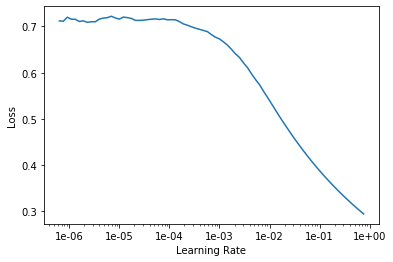

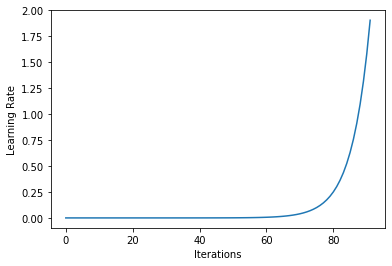

In [234]:
learn.lr_find()
learn.recorder.plot()
learn.recorder.plot_lr()

In [86]:
learn.fit(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.701434,0.686737,0.564838,00:00
1,0.956320,0.675254,0.589776,00:00
2,0.803062,0.666999,0.603491,00:00
3,0.734303,0.662697,0.615960,00:00
4,0.660072,0.658580,0.614713,00:00
5,0.594065,0.653560,0.614713,00:00
6,0.530025,0.647550,0.614713,00:00
7,0.474897,0.640810,0.614713,00:00
8,0.428496,0.635026,0.614713,00:00
9,0.385982,0.630735,0.614713,00:00


In [0]:
learn.save('1a')

In [88]:
learn.load('1a')

Learner(data=TabularDataBunch;

Train: LabelList (89 items)
x: TabularList
Pclass 1; Name Carter, Master. William Thornton II; Sex male; SibSp 1; Parch 2; Ticket 113760; Fare 120.0; Cabin B96 B98; Embarked S; Age_na False; Age -1.2705; ,Pclass 3; Name Thomas, Master. Assad Alexander; Sex male; SibSp 0; Parch 1; Ticket 2625; Fare 8.5167; Cabin #na#; Embarked C; Age_na False; Age -2.0621; ,Pclass 3; Name Hedman, Mr. Oskar Arvid; Sex male; SibSp 0; Parch 0; Ticket 347089; Fare 6.975; Cabin #na#; Embarked S; Age_na False; Age -0.0733; ,Pclass 3; Name Johansson, Mr. Karl Johan; Sex male; SibSp 0; Parch 0; Ticket 347063; Fare 7.775; Cabin #na#; Embarked S; Age_na False; Age 0.2259; ,Pclass 1; Name Andrews, Mr. Thomas Jr; Sex male; SibSp 0; Parch 0; Ticket 112050; Fare 0.0; Cabin A36; Embarked S; Age_na False; Age 0.8245; 
y: CategoryList
1,1,1,0,0
Path: data/happy_sugar_life;

Valid: LabelList (802 items)
x: TabularList
Pclass 3; Name #na#; Sex male; SibSp 1; Parch 0; Ticket #na#; Fare #na#;

In [89]:
learn.fit_one_cycle(10, slice(1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.041311,0.623583,0.614713,00:00
1,0.039279,0.619687,0.615960,00:00
2,0.034389,0.613734,0.618454,00:00
3,0.030575,0.607099,0.624688,00:00
4,0.027845,0.598178,0.637157,00:00
5,0.025114,0.592383,0.640898,00:00
6,0.022925,0.587404,0.638404,00:00
7,0.021292,0.575218,0.648379,00:00
8,0.019414,0.568878,0.665835,00:00
9,0.018207,0.560786,0.689526,00:00


In [92]:
learn.fit_one_cycle(3, slice(1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.005430,0.555787,0.699501,00:00
1,0.005390,0.549740,0.713217,00:00
2,0.005067,0.545090,0.721945,00:00


In [0]:
learn.save('2a')
learn.load('2a')

In [94]:
learn.fit_one_cycle(3, slice(1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.004679,0.541313,0.729426,00:00
1,0.003958,0.540550,0.721945,00:00
2,0.003799,0.535532,0.731920,00:00


In [0]:
learn.load('2b')

In [102]:
learn.fit_one_cycle(1, slice(1e-2))


epoch,train_loss,valid_loss,accuracy,time
0,0.002640,0.529099,0.750623,00:00


In [0]:
learn.recorder.plot_losses()

## Inference

In [147]:
df.iloc[1]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                           38
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
Name: 1, dtype: object

In [0]:
row = df.iloc[50]

In [0]:
learn.predict(row)

In [0]:
learn.export()

Load the test set

In [0]:
test_load = load_learner(path)

In [0]:
df_t = pd.read_csv(path/'/content/test.csv')

In [0]:
test_t = TabularList.from_df(df_t.iloc[0:418].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [0]:
test_idx = df_t.iloc[417]            #index from 0 to 417

In [208]:
df_t.iloc[0][0]

892

In [0]:
out_list=[["PassengerId","Survived"]]

In [227]:
out_list[0]

['PassengerId', 'Survived']

In [226]:
for x in range(0,418):
  sublist=[]
  sublist.append(df_t.iloc[x][0])
  _,answer,_=learn.predict(df_t.iloc[x])
  sublist.append(answer.item())
  assert(len(sublist)==2)
  out_list.append(sublist)
len(out_list), out_list[418]

(419, [1309, 0])

In [0]:
text = [my_str_as_bytes, my_str_as_bytes, my_str_as_bytes, my_str_as_bytes]
text_str = ["april,2,5,7", "may,3,5,8", "june,4,7,3", "july,5,6,9"]

In [181]:
my_str = "happy sugar life"
my_str_as_bytes = str.encode(my_str)
type(my_str_as_bytes) # ensure it is byte representation
# my_decoded_str = my_str_as_bytes.decode()
# type(my_decoded_str) # ensure it is string representation

bytes

In [0]:
with open('out1.txt','wb') as file:
    for line in text:
        file.write(line)
        file.write('\n')


In [206]:
i1 =0; i2=0;header_out=["PassengerId","Survived"]; i1,i2,header_out

(0, 0, ['PassengerId', 'Survived'])

In [0]:
import csv
with open('generate.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for x in out_list:
      writer.writerow(x)

In [230]:
gc.collect()

643

In [0]:
data